### Stock Analysis

The key idea is to use financial statements, news, tweets, forumns to dictate Share price. So we need to do the following
* WebScrape:
    * financial statements
    * share price
    * tweets
    * news
* Pre-process & clean:
* EDA:
* Sentiment Analysis on: news, tweets, and forumns
* check for significance of attributes

## WebScrape

In [1]:
# These codes are taken with reference to https://towardsdatascience.com/web-scraping-for-accounting-analysis-using-python-part-1-b5fc016a1c9a

import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as ur

In [2]:
# Enter a stock symbol
index= 'QAN.AX'
# URL link 
url_is = 'https://sg.finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://sg.finance.yahoo.com/quote/' + index +'/balance-sheet?p=' + index
url_cf = 'https://sg.finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

In [3]:
#Read the data
read_data_is = ur.urlopen(url_is).read() 
read_data_bs = ur.urlopen(url_bs).read()
read_data_cf = ur.urlopen(url_cf).read()

soup_is= BeautifulSoup(read_data_is,'lxml')
soup_bs= BeautifulSoup(read_data_bs,'lxml')
soup_cf= BeautifulSoup(read_data_cf,'lxml')

In [4]:
def ex_dat(emp_ls, soup_data, num_col):
    for i in soup_data.find_all('div'):
        emp_ls.append(i.string)
#     emp_ls = [e for e in emp_ls if e not in ('Operating Expenses', 'Non-recurring Events')]
    # Remove non div
    emp_ls = list(filter(None,emp_ls))
    
    # Remove non important scraped data
    emp_ls = emp_ls[10:]
    
    # Remove the 'Quarterly'
    emp_ls.pop(1)
    emp_ls = list(zip(*[iter(emp_ls)]*num_col))
    df = pd.DataFrame(emp_ls[0:])
    df.drop(df.tail(1).index, inplace=True)
    
    
    df.columns = df.iloc[0] # Name columns to first row of dataframe
    df = df.iloc[1:,] # start to read 1st row
    df = df.T # transpose dataframe

    df.columns = df.iloc[0] #Name columns to first row of dataframe
    df.drop(df.index[0],inplace=True) #Drop first index row
    
    df.index.name = '' # Remove the index name
    
    return df

In [5]:
ls_is = [] # Create empty list
ls_bs = []
ls_cf = []


for l in soup_is.find_all('div'): 
  #Find all data structure that is ‘div’
  ls_is.append(l.string) # add each element one by one to the list

    
ls_is = [e for e in ls_is if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns 

In [6]:
ls_bs = ex_dat(ls_bs, soup_bs, 5)
ls_cf = ex_dat(ls_cf, soup_cf, 6)

In [7]:
ls_bs


Annual,Cash and cash equivalents,Other short-term investments,Total cash,Net receivables,Inventory,Other current assets,Total current assets,"Gross property, plant and equipment",Accumulated depreciation,"Net property, plant and equipment",...,Deferred tax liabilities,Deferred revenues,Other long-term liabilities,Total non-current liabilities,Total liabilities,Common stock,Retained earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilities and stockholders' equity
,,,,,,,,,,,,,,,,,,,,,
30/06/2020,"3,520,000","216,000","3,736,000","335,000","306,000","72,000","4,952,000","30,697,000","-17,531,000","13,166,000",...,-,"2,256,000","47,000","10,196,000","18,500,000","3,053,000","-1,357,000","-173,000","1,523,000","20,026,000"
30/06/2019,"2,157,000","334,000","2,491,000","975,000","364,000","75,000","4,193,000","27,850,000","-14,873,000","12,977,000",...,"847,000","1,466,000","48,000","7,365,000","15,941,000","1,719,000","1,603,000","111,000","3,433,000","19,377,000"
30/06/2018,"1,694,000","474,000","2,168,000","908,000","351,000","167,000","3,712,000","12,851,000",-,"12,851,000",...,"910,000","1,446,000","25,000","7,092,000","14,688,000","2,393,000","1,084,000","479,000","3,956,000","18,647,000"
30/06/2017,"1,775,000","100,000","1,775,000","666,000","351,000","97,000","3,119,000","25,940,000","-13,687,000","12,253,000",...,"353,000","1,424,000","56,000","6,586,000","13,681,000","3,053,000","472,000","12,000","3,537,000","17,221,000"


In [8]:
ls_cf

Annual,"Investments in property, plant and equipment","Acquisitions, net",Purchases of investments,Sales/maturities of investments,Other investing activities,Net cash used for investing activities,Debt repayment,Common stock issued,Common stock repurchased,Dividends paid,Other financing activities,Net cash used provided by (used for) financing activities,Net change in cash,Cash at beginning of period,Cash at end of period,Capital expenditure,Free cash flow
,,,,,,,,,,,,,,,,,
ttm,"-1,944,000",-,"-60,000",-,"-130,000","-1,651,000","-744,000","1,342,000","-735,000","-363,000","-367,000","-705,000","451,000","1,694,000","2,157,000","-1,944,000","863,000"
30/06/2020,"-1,549,000",-,"-24,000",-,"-48,000","-1,571,000","-625,000","1,342,000","-448,000","-204,000","-367,000","1,853,000","1,365,000","2,157,000","3,520,000","-1,549,000","-466,000"
30/06/2019,"-1,944,000",-,"-60,000",-,"-130,000","-1,651,000","-744,000",-,"-735,000","-363,000",-,"-705,000","451,000","1,694,000","2,157,000","-1,944,000","863,000"
30/06/2018,"-1,959,000",-,"-2,000",-,"-274,000","-2,201,000","-802,000",-,"-913,000","-249,000",-,"-1,296,000","-84,000","1,775,000","1,694,000","-1,959,000","1,454,000"
30/06/2017,"-1,368,000",0,"-16,000",0,"-696,000","-2,046,000","-453,000",-,"-564,000","-264,000","8,000","-854,000","-196,000","1,980,000","1,775,000","-1,368,000","1,336,000"


In [9]:
ls_is = list(filter(None,ls_is))

In [10]:
ls_is

["No matching results for ''",
 'Tip: Try a valid symbol or a specific company name for relevant results',
 ' react-empty: 2 ',
 ' react-empty: 2 ',
 'Qantas Airways Limited (QAN.AX)',
 'ASX - ASX Delayed Price. Currency in AUD',
 'At close:  4:10PM AEDT',
 'Income statement',
 'Balance sheet',
 'Cash flow',
 'Annual',
 'Quarterly',
 'ttm',
 '30/06/2020',
 '30/06/2019',
 '30/06/2018',
 '30/06/2017',
 'Total revenue',
 '17,597,000',
 '14,054,000',
 '17,597,000',
 '16,628,000',
 '15,680,000',
 'Cost of revenue',
 '7,841,000',
 '6,415,000',
 '7,841,000',
 '6,828,000',
 '6,475,000',
 'Gross profit',
 '9,756,000',
 '7,639,000',
 '9,756,000',
 '9,800,000',
 '9,205,000',
 'Selling general and administrative',
 '5,514,000',
 '4,287,000',
 '5,514,000',
 '5,500,000',
 '5,335,000',
 'Total operating expenses',
 '8,888,000',
 '8,212,000',
 '8,888,000',
 '8,639,000',
 '8,174,000',
 'Operating income or loss',
 '868,000',
 '-573,000',
 '868,000',
 '1,161,000',
 '1,031,000',
 'Interest expense',
 '23

In [11]:
ls_is = ls_is[10:]

In [12]:
ls_is.pop(1)
ls_is


['Annual',
 'ttm',
 '30/06/2020',
 '30/06/2019',
 '30/06/2018',
 '30/06/2017',
 'Total revenue',
 '17,597,000',
 '14,054,000',
 '17,597,000',
 '16,628,000',
 '15,680,000',
 'Cost of revenue',
 '7,841,000',
 '6,415,000',
 '7,841,000',
 '6,828,000',
 '6,475,000',
 'Gross profit',
 '9,756,000',
 '7,639,000',
 '9,756,000',
 '9,800,000',
 '9,205,000',
 'Selling general and administrative',
 '5,514,000',
 '4,287,000',
 '5,514,000',
 '5,500,000',
 '5,335,000',
 'Total operating expenses',
 '8,888,000',
 '8,212,000',
 '8,888,000',
 '8,639,000',
 '8,174,000',
 'Operating income or loss',
 '868,000',
 '-573,000',
 '868,000',
 '1,161,000',
 '1,031,000',
 'Interest expense',
 '232,000',
 '208,000',
 '232,000',
 '230,000',
 '235,000',
 'Total other income/expenses net',
 '582,000',
 '-1,864,000',
 '582,000',
 '412,000',
 '346,000',
 'Income before tax',
 '1,265,000',
 '-2,708,000',
 '1,265,000',
 '1,391,000',
 '1,181,000',
 'Income tax expense',
 '374,000',
 '-744,000',
 '374,000',
 '411,000',
 '32

In [13]:
is_data = list(zip(*[iter(ls_is)]*6))

In [14]:
is_data

[('Annual', 'ttm', '30/06/2020', '30/06/2019', '30/06/2018', '30/06/2017'),
 ('Total revenue',
  '17,597,000',
  '14,054,000',
  '17,597,000',
  '16,628,000',
  '15,680,000'),
 ('Cost of revenue',
  '7,841,000',
  '6,415,000',
  '7,841,000',
  '6,828,000',
  '6,475,000'),
 ('Gross profit',
  '9,756,000',
  '7,639,000',
  '9,756,000',
  '9,800,000',
  '9,205,000'),
 ('Selling general and administrative',
  '5,514,000',
  '4,287,000',
  '5,514,000',
  '5,500,000',
  '5,335,000'),
 ('Total operating expenses',
  '8,888,000',
  '8,212,000',
  '8,888,000',
  '8,639,000',
  '8,174,000'),
 ('Operating income or loss',
  '868,000',
  '-573,000',
  '868,000',
  '1,161,000',
  '1,031,000'),
 ('Interest expense', '232,000', '208,000', '232,000', '230,000', '235,000'),
 ('Total other income/expenses net',
  '582,000',
  '-1,864,000',
  '582,000',
  '412,000',
  '346,000'),
 ('Income before tax',
  '1,265,000',
  '-2,708,000',
  '1,265,000',
  '1,391,000',
  '1,181,000'),
 ('Income tax expense',
  

In [15]:
income_stat = pd.DataFrame(is_data[0:])

In [16]:
income_stat

,0,1,2,3,4,5
0,Annual,ttm,30/06/2020,30/06/2019,30/06/2018,30/06/2017
1,Total revenue,"17,597,000","14,054,000","17,597,000","16,628,000","15,680,000"
2,Cost of revenue,"7,841,000","6,415,000","7,841,000","6,828,000","6,475,000"
3,Gross profit,"9,756,000","7,639,000","9,756,000","9,800,000","9,205,000"
4,Selling general and administrative,"5,514,000","4,287,000","5,514,000","5,500,000","5,335,000"
5,Total operating expenses,"8,888,000","8,212,000","8,888,000","8,639,000","8,174,000"
6,Operating income or loss,"868,000","-573,000","868,000","1,161,000","1,031,000"
7,Interest expense,"232,000","208,000","232,000","230,000","235,000"
8,Total other income/expenses net,"582,000","-1,864,000","582,000","412,000","346,000"
9,Income before tax,"1,265,000","-2,708,000","1,265,000","1,391,000","1,181,000"


In [17]:
# remove the last row 

income_stat.drop(income_stat.tail(1).index, inplace=True)

In [18]:
income_stat.columns = income_stat.iloc[0] # Name columns to first row of dataframe
income_stat = income_stat.iloc[1:,] # start to read 1st row
income_stat = income_stat.T # transpose dataframe

income_stat.columns = income_stat.iloc[0] #Name columns to first row of dataframe
income_stat.drop(income_stat.index[0],inplace=True) #Drop first index row
# Income_st.index.name = ‘’ # Remove the index name
# Income_st.rename(index={‘ttm’: ‘12/31/2019’},inplace=True) #Rename ttm in index columns to end of the year
# Income_st = Income_st[Income_st.columns[:-5]] # remove last 5 irrelevant columns

In [19]:
income_stat

Annual,Total revenue,Cost of revenue,Gross profit,Selling general and administrative,Total operating expenses,Operating income or loss,Interest expense,Total other income/expenses net,Income before tax,Income tax expense,Income from continuing operations,Net income,Net income available to common shareholders,Basic EPS,Diluted EPS,Basic average shares,Diluted average shares,EBITDA
0,,,,,,,,,,,,,,,,,,
ttm,"17,597,000","7,841,000","9,756,000","5,514,000","8,888,000","868,000","232,000","582,000","1,265,000","374,000","891,000","891,000","891,000",-,-,-,-,-
30/06/2020,"14,054,000","6,415,000","7,639,000","4,287,000","8,212,000","-573,000","208,000","-1,864,000","-2,708,000","-744,000","-1,964,000","-1,964,000","-1,964,000",-,-,-,-,"-455,000"
30/06/2019,"17,597,000","7,841,000","9,756,000","5,514,000","8,888,000","868,000","232,000","582,000","1,265,000","374,000","891,000","891,000","891,000",0.55,0.54,"1,634,000","1,637,868","3,162,000"
30/06/2018,"16,628,000","6,828,000","9,800,000","5,500,000","8,639,000","1,161,000","230,000","412,000","1,391,000","411,000","980,000","980,000","980,000",0.56,0.56,"1,756,000","1,756,000","3,149,000"
30/06/2017,"15,680,000","6,475,000","9,205,000","5,335,000","8,174,000","1,031,000","235,000","346,000","1,181,000","328,000","853,000","852,000","852,000",0.46,0.46,"1,808,226","1,808,226","2,798,000"


In [20]:
income_stat.index.name = '' # Remove the index name

In [21]:
income_stat

Annual,Total revenue,Cost of revenue,Gross profit,Selling general and administrative,Total operating expenses,Operating income or loss,Interest expense,Total other income/expenses net,Income before tax,Income tax expense,Income from continuing operations,Net income,Net income available to common shareholders,Basic EPS,Diluted EPS,Basic average shares,Diluted average shares,EBITDA
,,,,,,,,,,,,,,,,,,
ttm,"17,597,000","7,841,000","9,756,000","5,514,000","8,888,000","868,000","232,000","582,000","1,265,000","374,000","891,000","891,000","891,000",-,-,-,-,-
30/06/2020,"14,054,000","6,415,000","7,639,000","4,287,000","8,212,000","-573,000","208,000","-1,864,000","-2,708,000","-744,000","-1,964,000","-1,964,000","-1,964,000",-,-,-,-,"-455,000"
30/06/2019,"17,597,000","7,841,000","9,756,000","5,514,000","8,888,000","868,000","232,000","582,000","1,265,000","374,000","891,000","891,000","891,000",0.55,0.54,"1,634,000","1,637,868","3,162,000"
30/06/2018,"16,628,000","6,828,000","9,800,000","5,500,000","8,639,000","1,161,000","230,000","412,000","1,391,000","411,000","980,000","980,000","980,000",0.56,0.56,"1,756,000","1,756,000","3,149,000"
30/06/2017,"15,680,000","6,475,000","9,205,000","5,335,000","8,174,000","1,031,000","235,000","346,000","1,181,000","328,000","853,000","852,000","852,000",0.46,0.46,"1,808,226","1,808,226","2,798,000"


### Share Price



In [22]:
url_hist = 'https://sg.finance.yahoo.com/quote/'+ index +'/history?p='+ index



In [23]:
import yfinance as yf

<AxesSubplot:title={'center':"QAN's stock price"}, xlabel='Date'>

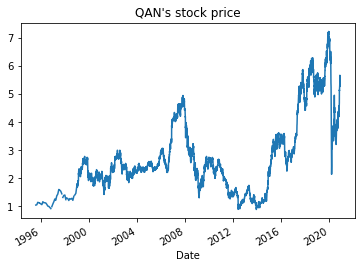

In [24]:
ticker = yf.Ticker(index)

qan_df = ticker.history(period="max")

qan_df['Close'].plot(title="QAN's stock price")

In [25]:
qan_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1995-07-31,1.044109,1.044109,1.044109,1.044109,0.0,0.000,0.0
1995-08-31,1.053821,1.053821,1.053821,1.053821,0.0,0.000,0.0
1995-09-29,1.141236,1.141236,1.141236,1.141236,0.0,0.000,0.0
1995-10-31,1.126666,1.126666,1.126666,1.126666,0.0,0.000,0.0
1995-11-03,NaN,NaN,NaN,NaN,NaN,0.035,0.0


In [26]:
qan_df_drop = qan_df.dropna()

<AxesSubplot:title={'center':"QAN's stock price"}, xlabel='Date'>

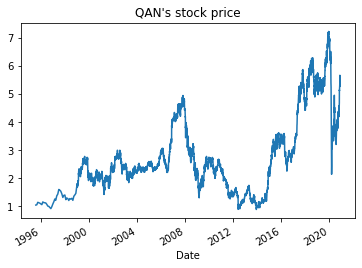

In [27]:
qan_df_drop['Close'].plot(title="QAN's stock price")

In [28]:
# convert Date Column into date time
# qan_df_drop['Date'] = pd.to_datetime(qan_df_drop.Date)

qan_df_drop = qan_df_drop.reset_index()

In [29]:
qan_df_drop.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Dividends              float64
Stock Splits           float64
dtype: object

In [30]:
start_date = "2014-12-31"
end_date = "2020-12-31"

after_start_date = qan_df_drop["Date"] >= start_date
before_end_date = qan_df_drop["Date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates = qan_df_drop.loc[between_two_dates]



In [31]:
filtered_dates.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Dividends              float64
Stock Splits           float64
dtype: object

<AxesSubplot:title={'center':"QAN's 2015-2020"}, xlabel='Date'>

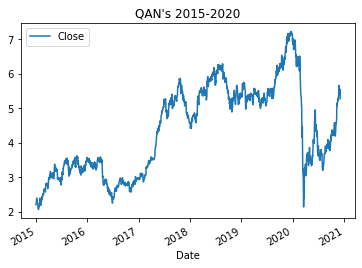

In [32]:
filtered_dates.plot(x = "Date", y = "Close", title = "QAN's 2015-2020")

In [33]:
import os
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models.widgets import Dropdown
from bokeh.io import curdoc
from bokeh.layouts import column

from bokeh.models import BooleanFilter, CDSView, Select, Range1d, HoverTool
from bokeh.palettes import Category20
from bokeh.models.formatters import NumeralTickFormatter

In [34]:
# this is to experiment on interactive charts like yahoo finance

# def plot_stock_price(stock):
#     p = figure(plot_width=W_PLOT, plot_height=H_PLOT, tools=TOOLS,
#                title="Stock price", toolbar_location='above')

#     inc = stock.data['Close'] > stock.data['Open']
#     dec = stock.data['Open'] > stock.data['Close']
#     view_inc = CDSView(source=stock, filters=[BooleanFilter(inc)])
#     view_dec = CDSView(source=stock, filters=[BooleanFilter(dec)])

#     p.segment(x0='index', x1='index', y0='Low', y1='High', color=RED, source=stock, view=view_inc)
#     p.segment(x0='index', x1='index', y0='Low', y1='High', color=GREEN, source=stock, view=view_dec)

#     p.vbar(x='index', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=BLUE, line_color=BLUE,
#            source=stock,view=view_inc, name="price")
#     p.vbar(x='index', width=VBAR_WIDTH, top='Open', bottom='Close', fill_color=RED, line_color=RED,
#            source=stock,view=view_dec, name="price")

#     p.legend.location = "top_left"
#     p.legend.border_line_alpha = 0
#     p.legend.background_fill_alpha = 0
#     p.legend.click_policy = "mute"
    
#     return p

In [35]:
# plot_stock_price(qan_df_drop)

### News

Now we are interested in seeing if news or any significant event would affect the share prices

Data from : https://github.com/owid/covid-19-data/tree/master/public/data


## COVID AUSTRALIA DATA


In [36]:
# COVID

cov_dat = pd.read_csv("./owid-covid-data.csv")



In [37]:

cov_dat.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-26,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-27,NaN,0.0,NaN,NaN,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [38]:
aus_cov = cov_dat[cov_dat.location == 'Australia']

In [39]:
# aus_cov[["date"]] = aus_cov[["date"]].apply(pd.to_datetime, format='%Y-%m-%d')
aus_cov.loc[:,'date']= aus_cov['date'].apply(pd.to_datetime, format='%Y-%m-%d')

C:\Users\LKT-SG\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [40]:
aus_cov.dtypes


iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 float64
icu_patients_per_million                     f

In [41]:
print("Dimensions for Aus Covid Data: ", aus_cov.shape)

aus_cov.head()

Dimensions for Aus Covid Data:  (317, 50)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2536,AUS,Oceania,Australia,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2537,AUS,Oceania,Australia,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2538,AUS,Oceania,Australia,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2539,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2540,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939


In [42]:
non_emp = 0
nan_list = []

for i in aus_cov.columns:
    if aus_cov[i].isna().sum() != 0:
        nan_list.append(i)
        print("{} NaN: ".format(i), aus_cov[i].isna().sum())
    else:
        non_emp += 1

total_cases NaN:  3
new_cases_smoothed NaN:  5
total_deaths NaN:  38
new_deaths_smoothed NaN:  5
total_cases_per_million NaN:  3
new_cases_smoothed_per_million NaN:  5
total_deaths_per_million NaN:  38
new_deaths_smoothed_per_million NaN:  5
reproduction_rate NaN:  62
icu_patients NaN:  317
icu_patients_per_million NaN:  317
hosp_patients NaN:  317
hosp_patients_per_million NaN:  317
weekly_icu_admissions NaN:  317
weekly_icu_admissions_per_million NaN:  317
weekly_hosp_admissions NaN:  317
weekly_hosp_admissions_per_million NaN:  317
total_tests NaN:  107
new_tests NaN:  128
total_tests_per_thousand NaN:  107
new_tests_per_thousand NaN:  128
new_tests_smoothed NaN:  67
new_tests_smoothed_per_thousand NaN:  67
positive_rate NaN:  67
tests_per_case NaN:  67
tests_units NaN:  60
stringency_index NaN:  4
handwashing_facilities NaN:  317


In [43]:
nan_list

for col in nan_list:
    print("--------{}-------".format(col))
    print(aus_cov[col].value_counts(dropna=False))

--------total_cases-------
15.0       22
NaN         3
12.0        3
128.0       2
5.0         2
           ..
6610.0      1
1549.0      1
9797.0      1
27405.0     1
27652.0     1
Name: total_cases, Length: 287, dtype: int64
--------new_cases_smoothed-------
0.000      15
15.143      6
NaN         5
10.857      5
10.000      5
           ..
17.714      1
383.143     1
173.571     1
31.571      1
352.857     1
Name: new_cases_smoothed, Length: 218, dtype: int64
--------total_deaths-------
NaN      38
907.0    33
102.0    25
104.0    11
3.0       9
         ..
872.0     1
888.0     1
517.0     1
611.0     1
208.0     1
Name: total_deaths, Length: 140, dtype: int64
--------new_deaths_smoothed-------
0.000     83
0.286     36
0.143     28
0.571     13
0.429     11
          ..
3.571      1
6.286      1
18.857     1
16.286     1
16.429     1
Name: new_deaths_smoothed, Length: 79, dtype: int64
--------total_cases_per_million-------
0.588       22
0.471        3
NaN          3
278.982      2

In [44]:
# Show all the entries that are Nan

# df.loc[df['column_name'] == some_value]

aus_cov.loc[aus_cov.total_cases.isnull()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2536,AUS,Oceania,Australia,2020-01-23,NaN,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2537,AUS,Oceania,Australia,2020-01-24,NaN,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2538,AUS,Oceania,Australia,2020-01-25,NaN,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939


In [45]:
# We can replace the NaN in total_cases to 0 for ease of use

aus_cov[["total_cases"]] = aus_cov[['total_cases']].fillna(0)

C:\Users\LKT-SG\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
aus_cov

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2536,AUS,Oceania,Australia,2020-01-23,0.0,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2537,AUS,Oceania,Australia,2020-01-24,0.0,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2538,AUS,Oceania,Australia,2020-01-25,0.0,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2539,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2540,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,AUS,Oceania,Australia,2020-11-30,27912.0,10.0,9.857,908.0,0.0,0.143,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2849,AUS,Oceania,Australia,2020-12-01,27923.0,11.0,10.000,908.0,0.0,0.143,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2850,AUS,Oceania,Australia,2020-12-02,27939.0,16.0,10.571,908.0,0.0,0.143,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2851,AUS,Oceania,Australia,2020-12-03,27949.0,10.0,10.857,908.0,0.0,0.143,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939


In [47]:
aus_cov.loc[aus_cov.new_cases_smoothed.isnull()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
2536,AUS,Oceania,Australia,2020-01-23,0.0,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2537,AUS,Oceania,Australia,2020-01-24,0.0,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2538,AUS,Oceania,Australia,2020-01-25,0.0,0.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2539,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939
2540,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.0,NaN,...,44648.71,0.5,107.791,5.07,13.0,16.5,NaN,3.84,83.44,0.939


In [48]:
non_emp

22

In [49]:
aus_cov.handwashing_facilities.isnull().sum()

317

Since Handwashing_facilities has 317 NaN we can assume that it is not being recorded in Australia, hence we will remove the column

In [50]:
# removed respective column
aus_cov = aus_cov.drop(['handwashing_facilities'], axis=1)

In [51]:

aus_cov.loc[aus_cov.new_deaths_smoothed.isnull()]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
2536,AUS,Oceania,Australia,2020-01-23,0.0,0.0,NaN,NaN,0.0,NaN,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2537,AUS,Oceania,Australia,2020-01-24,0.0,0.0,NaN,NaN,0.0,NaN,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2538,AUS,Oceania,Australia,2020-01-25,0.0,0.0,NaN,NaN,0.0,NaN,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2539,AUS,Oceania,Australia,2020-01-26,4.0,4.0,NaN,NaN,0.0,NaN,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2540,AUS,Oceania,Australia,2020-01-27,5.0,1.0,NaN,NaN,0.0,NaN,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939


In [52]:
aus_cov.loc[aus_cov.total_deaths.isnull()]['new_deaths'] == 0

2536    True
2537    True
2538    True
2539    True
2540    True
2541    True
2542    True
2543    True
2544    True
2545    True
2546    True
2547    True
2548    True
2549    True
2550    True
2551    True
2552    True
2553    True
2554    True
2555    True
2556    True
2557    True
2558    True
2559    True
2560    True
2561    True
2562    True
2563    True
2564    True
2565    True
2566    True
2567    True
2568    True
2569    True
2570    True
2571    True
2572    True
2573    True
Name: new_deaths, dtype: bool

Upon analysing it appears that as long as new_deaths equals to 0, total_deaths will be NaN. We will change total_deaths' NaN's to 0

In [53]:
aus_cov[["total_deaths"]] = aus_cov[['total_deaths']].fillna(0)

In [54]:
# We will be removing any smoothing since we do not know what it means

nan_list

for col in nan_list:
    if 'smoothed' in col:
        nan_list.remove(col)

In [55]:
nan_list.remove("handwashing_facilities")


In [56]:
nan_list.remove('new_tests_smoothed_per_thousand')
nan_list


['total_cases',
 'total_deaths',
 'total_cases_per_million',
 'total_deaths_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'stringency_index']

In [57]:
col_list = []
removed_col = 0
for col in aus_cov.columns:
    if "smoothed" not in col:
        col_list.append(col)
    else:
        removed_col += 1
        
col_list

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [58]:
aus_cov = aus_cov[col_list]

In [59]:
aus_cov

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
2536,AUS,Oceania,Australia,2020-01-23,0.0,0.0,0.0,0.0,NaN,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2537,AUS,Oceania,Australia,2020-01-24,0.0,0.0,0.0,0.0,NaN,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2538,AUS,Oceania,Australia,2020-01-25,0.0,0.0,0.0,0.0,NaN,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2539,AUS,Oceania,Australia,2020-01-26,4.0,4.0,0.0,0.0,0.157,0.157,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2540,AUS,Oceania,Australia,2020-01-27,5.0,1.0,0.0,0.0,0.196,0.039,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,AUS,Oceania,Australia,2020-11-30,27912.0,10.0,908.0,0.0,1094.593,0.392,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2849,AUS,Oceania,Australia,2020-12-01,27923.0,11.0,908.0,0.0,1095.025,0.431,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2850,AUS,Oceania,Australia,2020-12-02,27939.0,16.0,908.0,0.0,1095.652,0.627,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2851,AUS,Oceania,Australia,2020-12-03,27949.0,10.0,908.0,0.0,1096.044,0.392,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939


In [60]:
def nan_id(df):


    non_emp = 0
    nan_list = []

    for i in aus_cov.columns:
        if aus_cov[i].isna().sum() != 0:
            nan_list.append(i)
            print("{} NaN: ".format(i), aus_cov[i].isna().sum())
        else:
            non_emp += 1

    return non_emp, nan_list

So as seen above, icu_patients and hosp_patients are not being recorded in Australia dataset, hence we are removing these columns

In [61]:
import seaborn as sns

# col_list.remove("reproduction_rate")

# for col in col_list:
#     aus_cov[aus_cov.reproduction_rate.isnull()].plot(x = "reproduction_rate", y = col)


In [62]:
# aus_cov[aus_cov.reproduction_rate.isnull()].to_csv('../rep_rate_0.csv', index = False)

In [63]:
aus_cov = aus_cov.drop(['icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million'], axis=1)

In [64]:
aus_cov.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
2536,AUS,Oceania,Australia,2020-01-23,0.0,0.0,0.0,0.0,NaN,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2537,AUS,Oceania,Australia,2020-01-24,0.0,0.0,0.0,0.0,NaN,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2538,AUS,Oceania,Australia,2020-01-25,0.0,0.0,0.0,0.0,NaN,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2539,AUS,Oceania,Australia,2020-01-26,4.0,4.0,0.0,0.0,0.157,0.157,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2540,AUS,Oceania,Australia,2020-01-27,5.0,1.0,0.0,0.0,0.196,0.039,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939


In [65]:
not_empty, nan_ls = nan_id(aus_cov)

total_cases_per_million NaN:  3
total_deaths_per_million NaN:  38
reproduction_rate NaN:  62
total_tests NaN:  107
new_tests NaN:  128
total_tests_per_thousand NaN:  107
new_tests_per_thousand NaN:  128
positive_rate NaN:  67
tests_per_case NaN:  67
tests_units NaN:  60
stringency_index NaN:  4


In [66]:
not_empty

24

In [67]:
nan_ls

['total_cases_per_million',
 'total_deaths_per_million',
 'reproduction_rate',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'stringency_index']

In [68]:
aus_cov[['total_cases_per_million',
 'total_deaths_per_million',
 'reproduction_rate',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'stringency_index']].head(20)

,total_cases_per_million,total_deaths_per_million,reproduction_rate,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index
2536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
2539,0.157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
2540,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
2541,0.196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
2542,0.235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
2543,0.353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
2544,0.353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.11
2545,0.471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.44


In [69]:
aus_cov2 = aus_cov.fillna(0)

In [70]:
aus_cov2.isna().sum()

iso_code                      0
continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
reproduction_rate             0
total_tests                   0
new_tests                     0
total_tests_per_thousand      0
new_tests_per_thousand        0
positive_rate                 0
tests_per_case                0
tests_units                   0
stringency_index              0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smo

#### NaNs dealt with

So with the Nans either removed or imputed we move on to cleaning the data.

<AxesSubplot:>

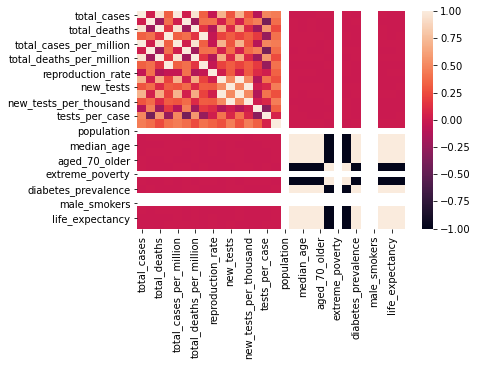

In [71]:
sns.heatmap(aus_cov2.corr())

In [74]:
aus_cov2.tests_units.value_counts()

tests performed    257
0                   60
Name: tests_units, dtype: int64

In [75]:


aus_cov2.tests_units = aus_cov2.tests_units.replace(['tests performed'], 
                     [1]) 

In [76]:
aus_cov2.tests_units.value_counts()

1    257
0     60
Name: tests_units, dtype: int64

In [77]:
aus_cov2.dtypes

iso_code                              object
continent                             object
location                              object
date                          datetime64[ns]
total_cases                          float64
new_cases                            float64
total_deaths                         float64
new_deaths                           float64
total_cases_per_million              float64
new_cases_per_million                float64
total_deaths_per_million             float64
new_deaths_per_million               float64
reproduction_rate                    float64
total_tests                          float64
new_tests                            float64
total_tests_per_thousand             float64
new_tests_per_thousand               float64
positive_rate                        float64
tests_per_case                       float64
tests_units                            int64
stringency_index                     float64
population                           float64
population

In [84]:
list(aus_cov2.iloc[:,4:].columns)

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'reproduction_rate',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

C:\Users\LKT-SG\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


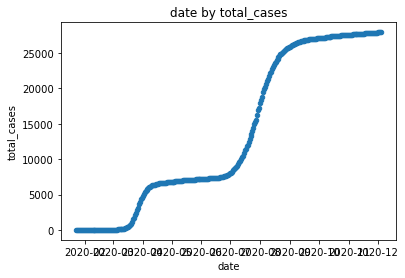

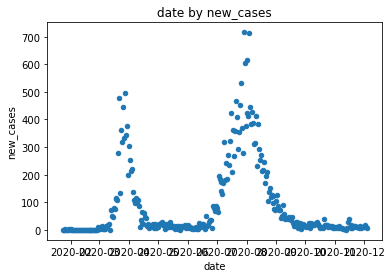

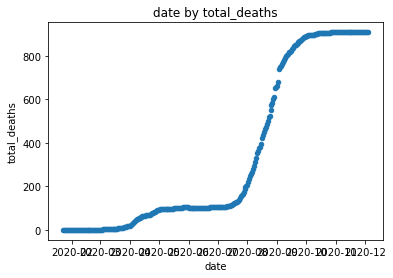

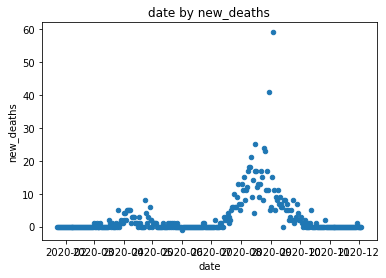

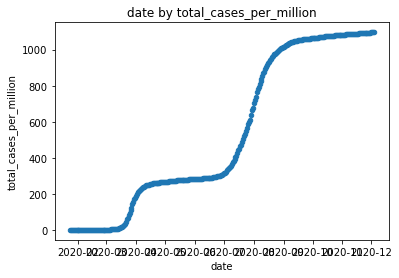

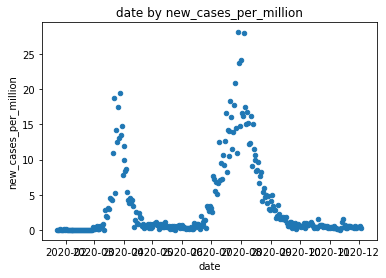

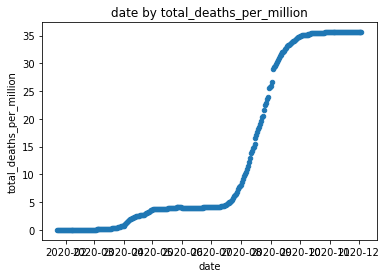

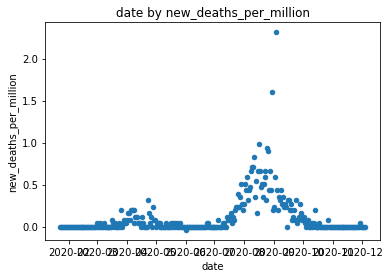

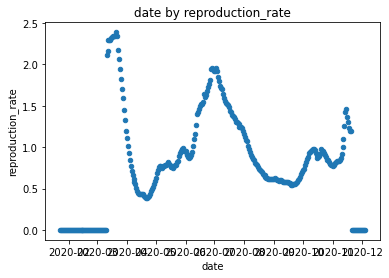

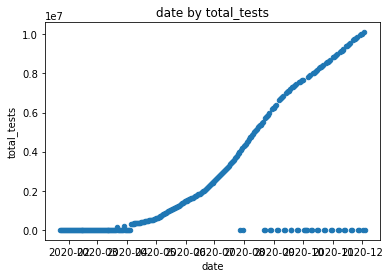

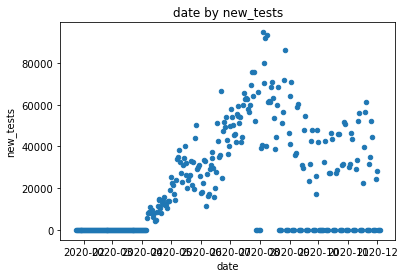

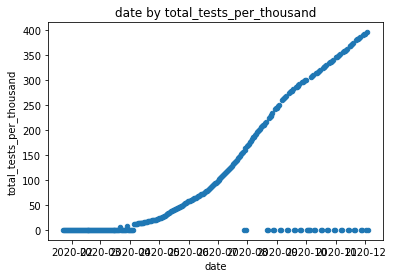

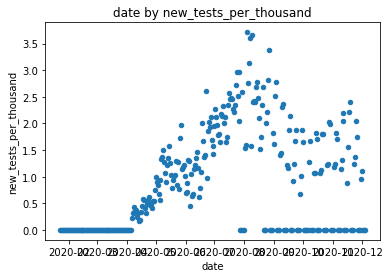

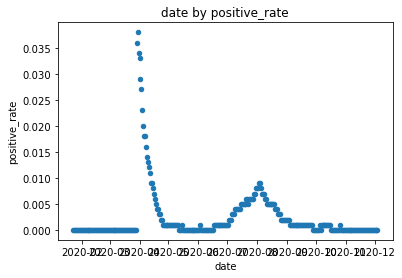

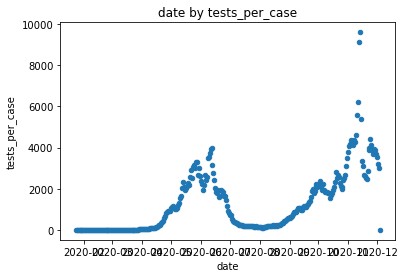

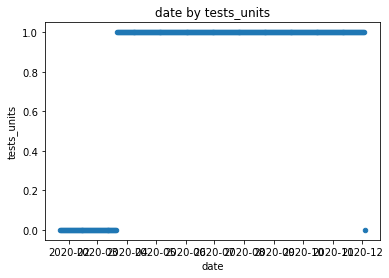

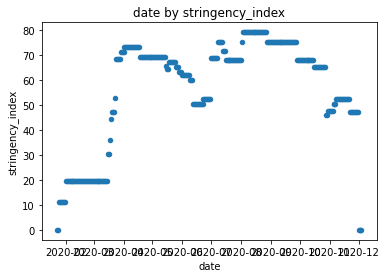

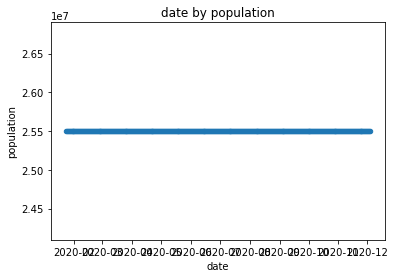

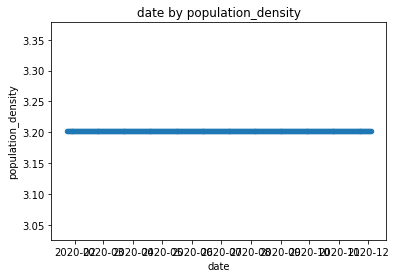

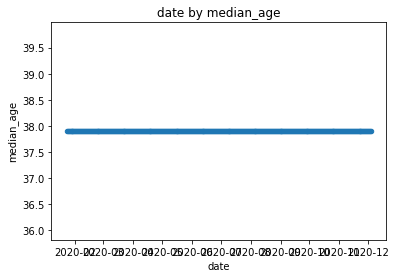

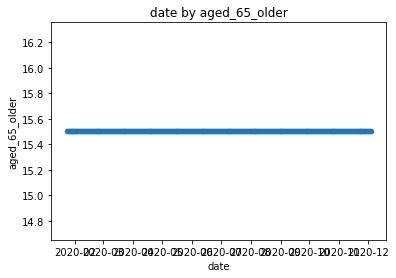

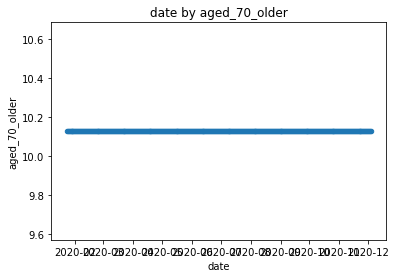

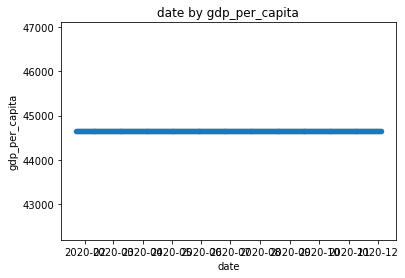

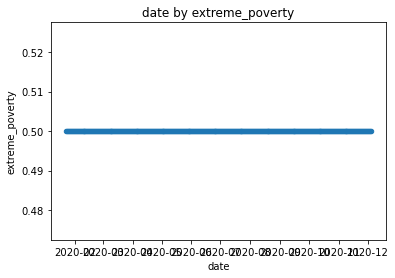

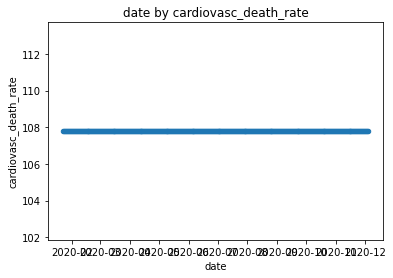

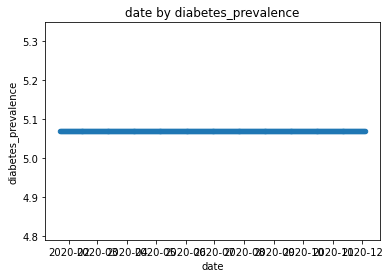

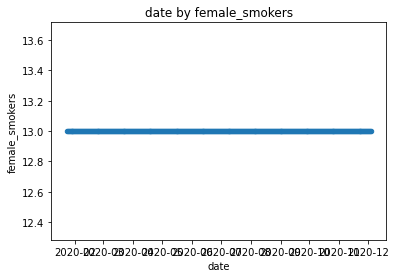

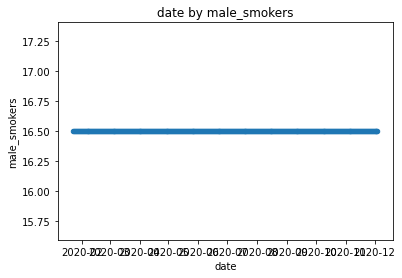

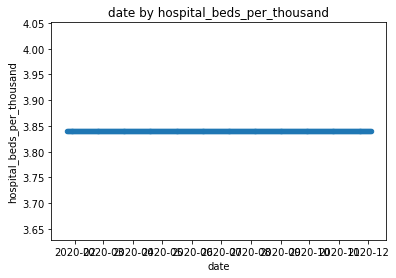

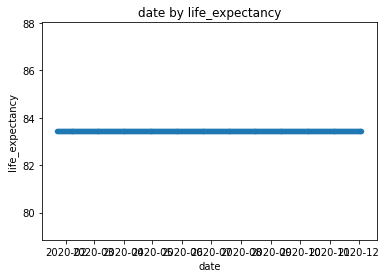

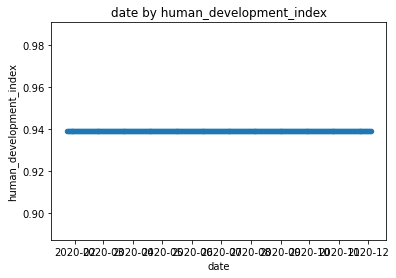

In [86]:
for col in list(aus_cov2.iloc[:,4:].columns):
    aus_cov2.plot.scatter(x = "date", y = col, title = "date by {}".format(col))

### Merge and Analyse

With financial statements data, share price, and COVID data, we will now merge the data set and perform analysis

In [87]:
# Share price QAN
filtered_dates.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4120,2014-12-31,2.214356,2.223544,2.182200,2.205168,2869716.0,0.0,0.0
4121,2015-01-02,2.205168,2.223545,2.191389,2.223545,2836579.0,0.0,0.0
4122,2015-01-05,2.223545,2.297053,2.214356,2.297053,6809838.0,0.0,0.0
4123,2015-01-06,2.297053,2.425684,2.278676,2.398118,17962571.0,0.0,0.0
4124,2015-01-07,2.425684,2.425684,2.333798,2.352175,10266033.0,0.0,0.0


In [88]:
# COVID data
aus_cov2.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
2536,AUS,Oceania,Australia,2020-01-23,0.0,0.0,0.0,0.0,0.000,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2537,AUS,Oceania,Australia,2020-01-24,0.0,0.0,0.0,0.0,0.000,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2538,AUS,Oceania,Australia,2020-01-25,0.0,0.0,0.0,0.0,0.000,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2539,AUS,Oceania,Australia,2020-01-26,4.0,4.0,0.0,0.0,0.157,0.157,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2540,AUS,Oceania,Australia,2020-01-27,5.0,1.0,0.0,0.0,0.196,0.039,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939


In [93]:
# filter only 2020 data for covid analysis

qan_2020 = qan_df_drop[qan_df_drop["Date"] >= "2019-12-31"]

In [90]:
aus_cov2.shape

(317, 35)

In [91]:
aus_cov2.set_index("date")

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,AUS,Oceania,Australia,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2020-01-24,AUS,Oceania,Australia,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2020-01-25,AUS,Oceania,Australia,0.0,0.0,0.0,0.0,0.000,0.000,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2020-01-26,AUS,Oceania,Australia,4.0,4.0,0.0,0.0,0.157,0.157,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2020-01-27,AUS,Oceania,Australia,5.0,1.0,0.0,0.0,0.196,0.039,0.000,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-30,AUS,Oceania,Australia,27912.0,10.0,908.0,0.0,1094.593,0.392,35.608,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2020-12-01,AUS,Oceania,Australia,27923.0,11.0,908.0,0.0,1095.025,0.431,35.608,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939
2020-12-02,AUS,Oceania,Australia,27939.0,16.0,908.0,0.0,1095.652,0.627,35.608,...,10.129,44648.71,0.5,107.791,5.07,13.0,16.5,3.84,83.44,0.939


In [109]:
qan_cov = aus_cov2.join(qan_2020.set_index("Date"), on = "date")


In [110]:
qan_cov.dtypes

iso_code                              object
continent                             object
location                              object
date                          datetime64[ns]
total_cases                          float64
new_cases                            float64
total_deaths                         float64
new_deaths                           float64
total_cases_per_million              float64
new_cases_per_million                float64
total_deaths_per_million             float64
new_deaths_per_million               float64
reproduction_rate                    float64
total_tests                          float64
new_tests                            float64
total_tests_per_thousand             float64
new_tests_per_thousand               float64
positive_rate                        float64
tests_per_case                       float64
tests_units                            int64
stringency_index                     float64
population                           float64
population

In [111]:
qan_2020.shape

(239, 8)

In [112]:
qan_cov.shape

(317, 42)

In [113]:
qan_cov.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,hospital_beds_per_thousand,life_expectancy,human_development_index,Open,High,Low,Close,Volume,Dividends,Stock Splits
2536,AUS,Oceania,Australia,2020-01-23,0.0,0.0,0.0,0.0,0.000,0.000,...,3.84,83.44,0.939,6.624241,6.663264,6.487658,6.497414,14837799.0,0.0,0.0
2537,AUS,Oceania,Australia,2020-01-24,0.0,0.0,0.0,0.0,0.000,0.000,...,3.84,83.44,0.939,6.585217,6.624241,6.546194,6.546194,9301187.0,0.0,0.0
2538,AUS,Oceania,Australia,2020-01-25,0.0,0.0,0.0,0.0,0.000,0.000,...,3.84,83.44,0.939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2539,AUS,Oceania,Australia,2020-01-26,4.0,4.0,0.0,0.0,0.157,0.157,...,3.84,83.44,0.939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2540,AUS,Oceania,Australia,2020-01-27,5.0,1.0,0.0,0.0,0.196,0.039,...,3.84,83.44,0.939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
qan_cov.date.max() - qan_cov.date.min()

Timedelta('316 days 00:00:00')